## Assignment
In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

Load the dataset from the Thinkful's database. Here's the credentials you can use to connect to the database:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [5]:
# credentials for database
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'



#create engine to access database
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
))

#creat dataframe from data 
heartdisease_df = pd.read_sql_query('select * from heartdisease', con=engine)

#dispose of engine
engine.dispose() 
#As in earlier assignments, be sure to close the database connection 
# after initially pulling in your data.

heartdisease_df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks below, and plan on discussing with your mentor. You can also take a look at these example solutions.


2. Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

## 1. Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

In [8]:
X_std = StandardScaler().fit_transform(X)

linkage Methods
- ward -only works with euclidiean distance and finds sphreical clusters

- complete - highly similar observations  with compact groups

- average - links clusters with centriods allows for different sizes and shapes 

In [48]:
# define the clustering algorithm
ward_aglomerative_clust = AgglomerativeClustering(linkage  = 'ward',
                                            affinity  = 'euclidean',
                                            n_clusters= 2)

# define the clustering algorithm
comp_aglomerative_clust = AgglomerativeClustering(linkage  = 'complete',
                                            affinity  = 'cosine',
                                            n_clusters= 2)

# define the clustering algorithm
avg_aglomerative_clust = AgglomerativeClustering(linkage  = 'average',
                                            affinity  = 'euclidean',
                                            n_clusters= 2)



#fit the model to the data
ward_clusters = ward_aglomerative_clust.fit_predict(X_std)
comp_clusters = comp_aglomerative_clust.fit_predict(X_std)
avg_clusters = avg_aglomerative_clust.fit_predict(X_std)

In [ ]:
for 

In [49]:
pca = PCA(n_components=2).fit_transform(X_std)

print(max(pca[0]),min(pca[0]))
print(max(pca[1]),min(pca[1]))

1.1612724991047056 0.9385945074334993
3.2377680356119605 1.4239369858774724


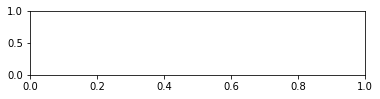

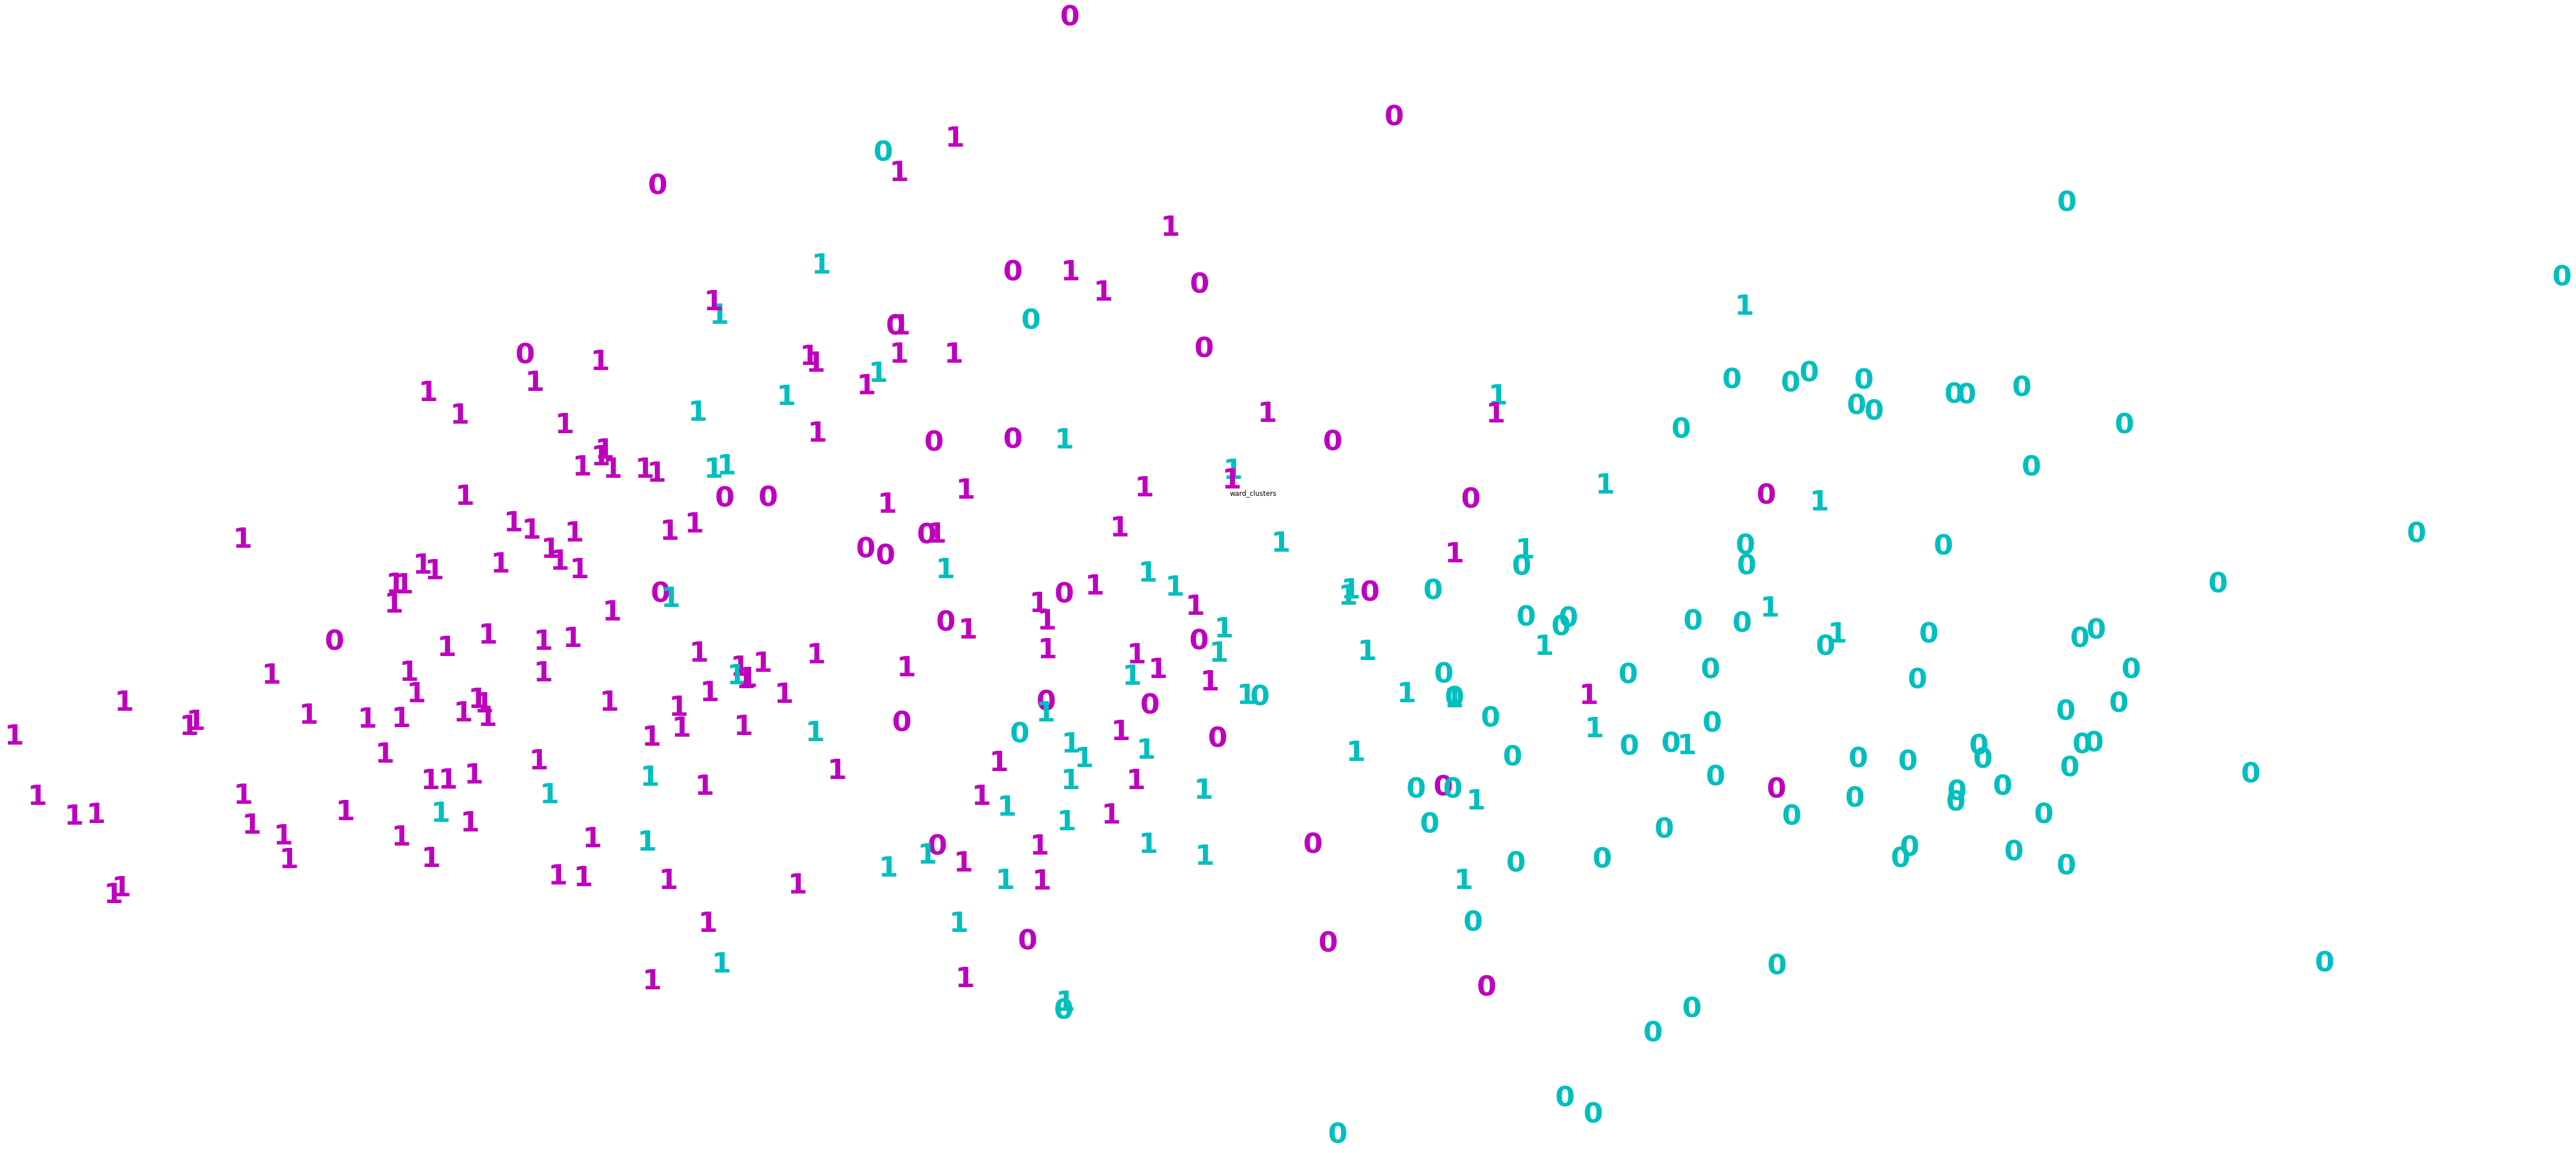

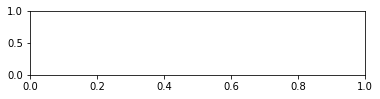

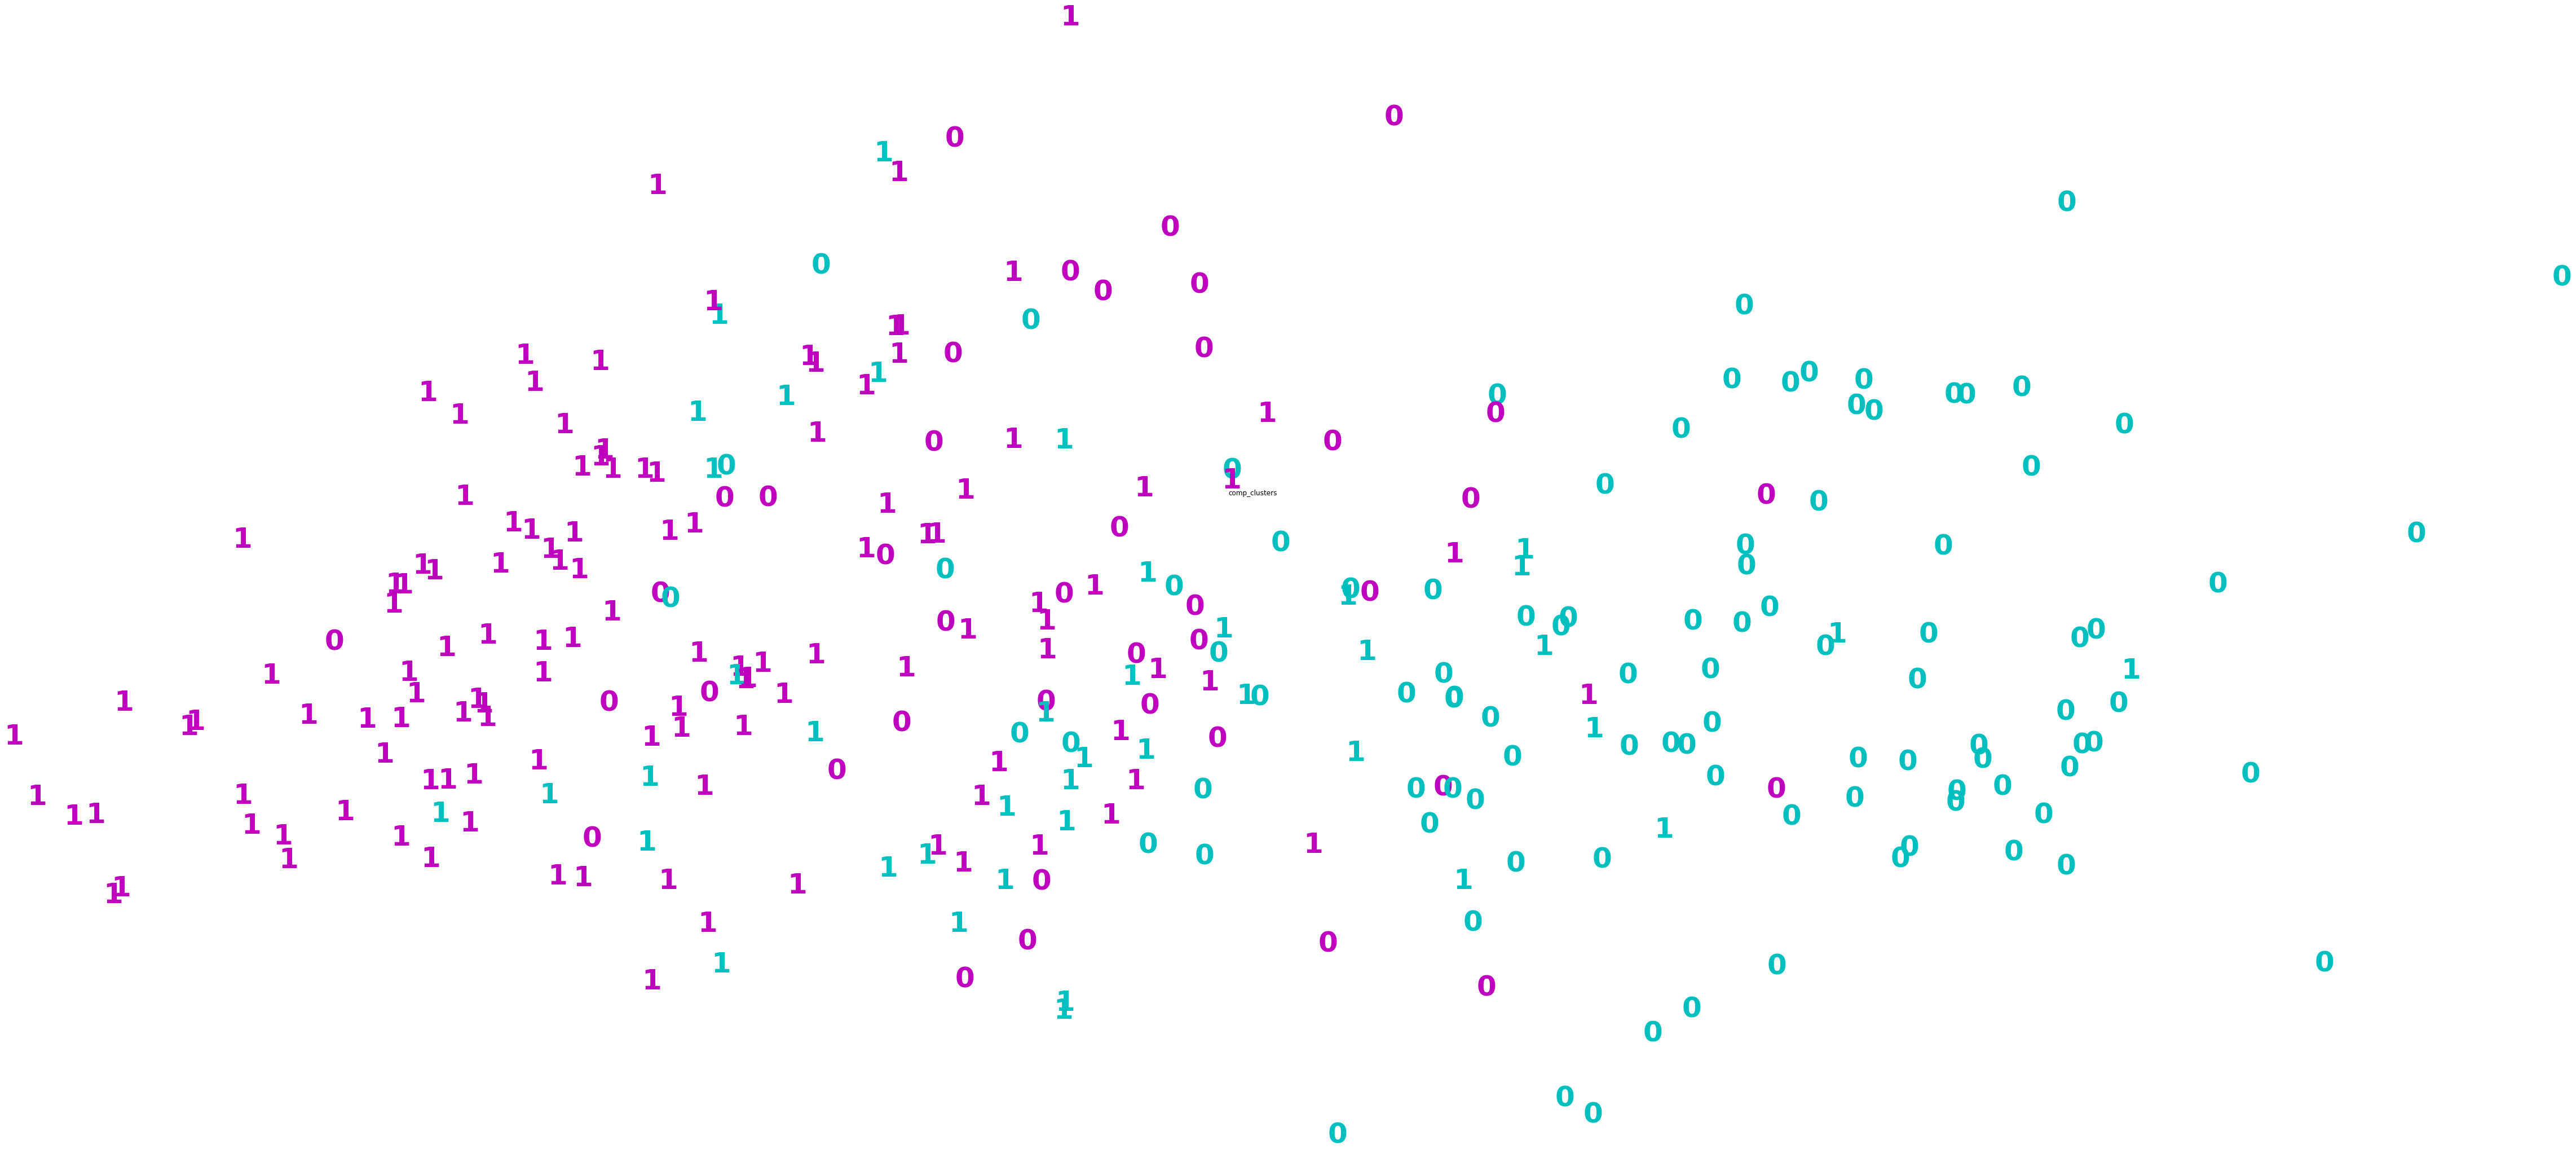

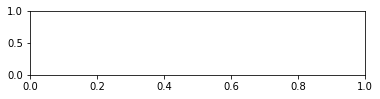

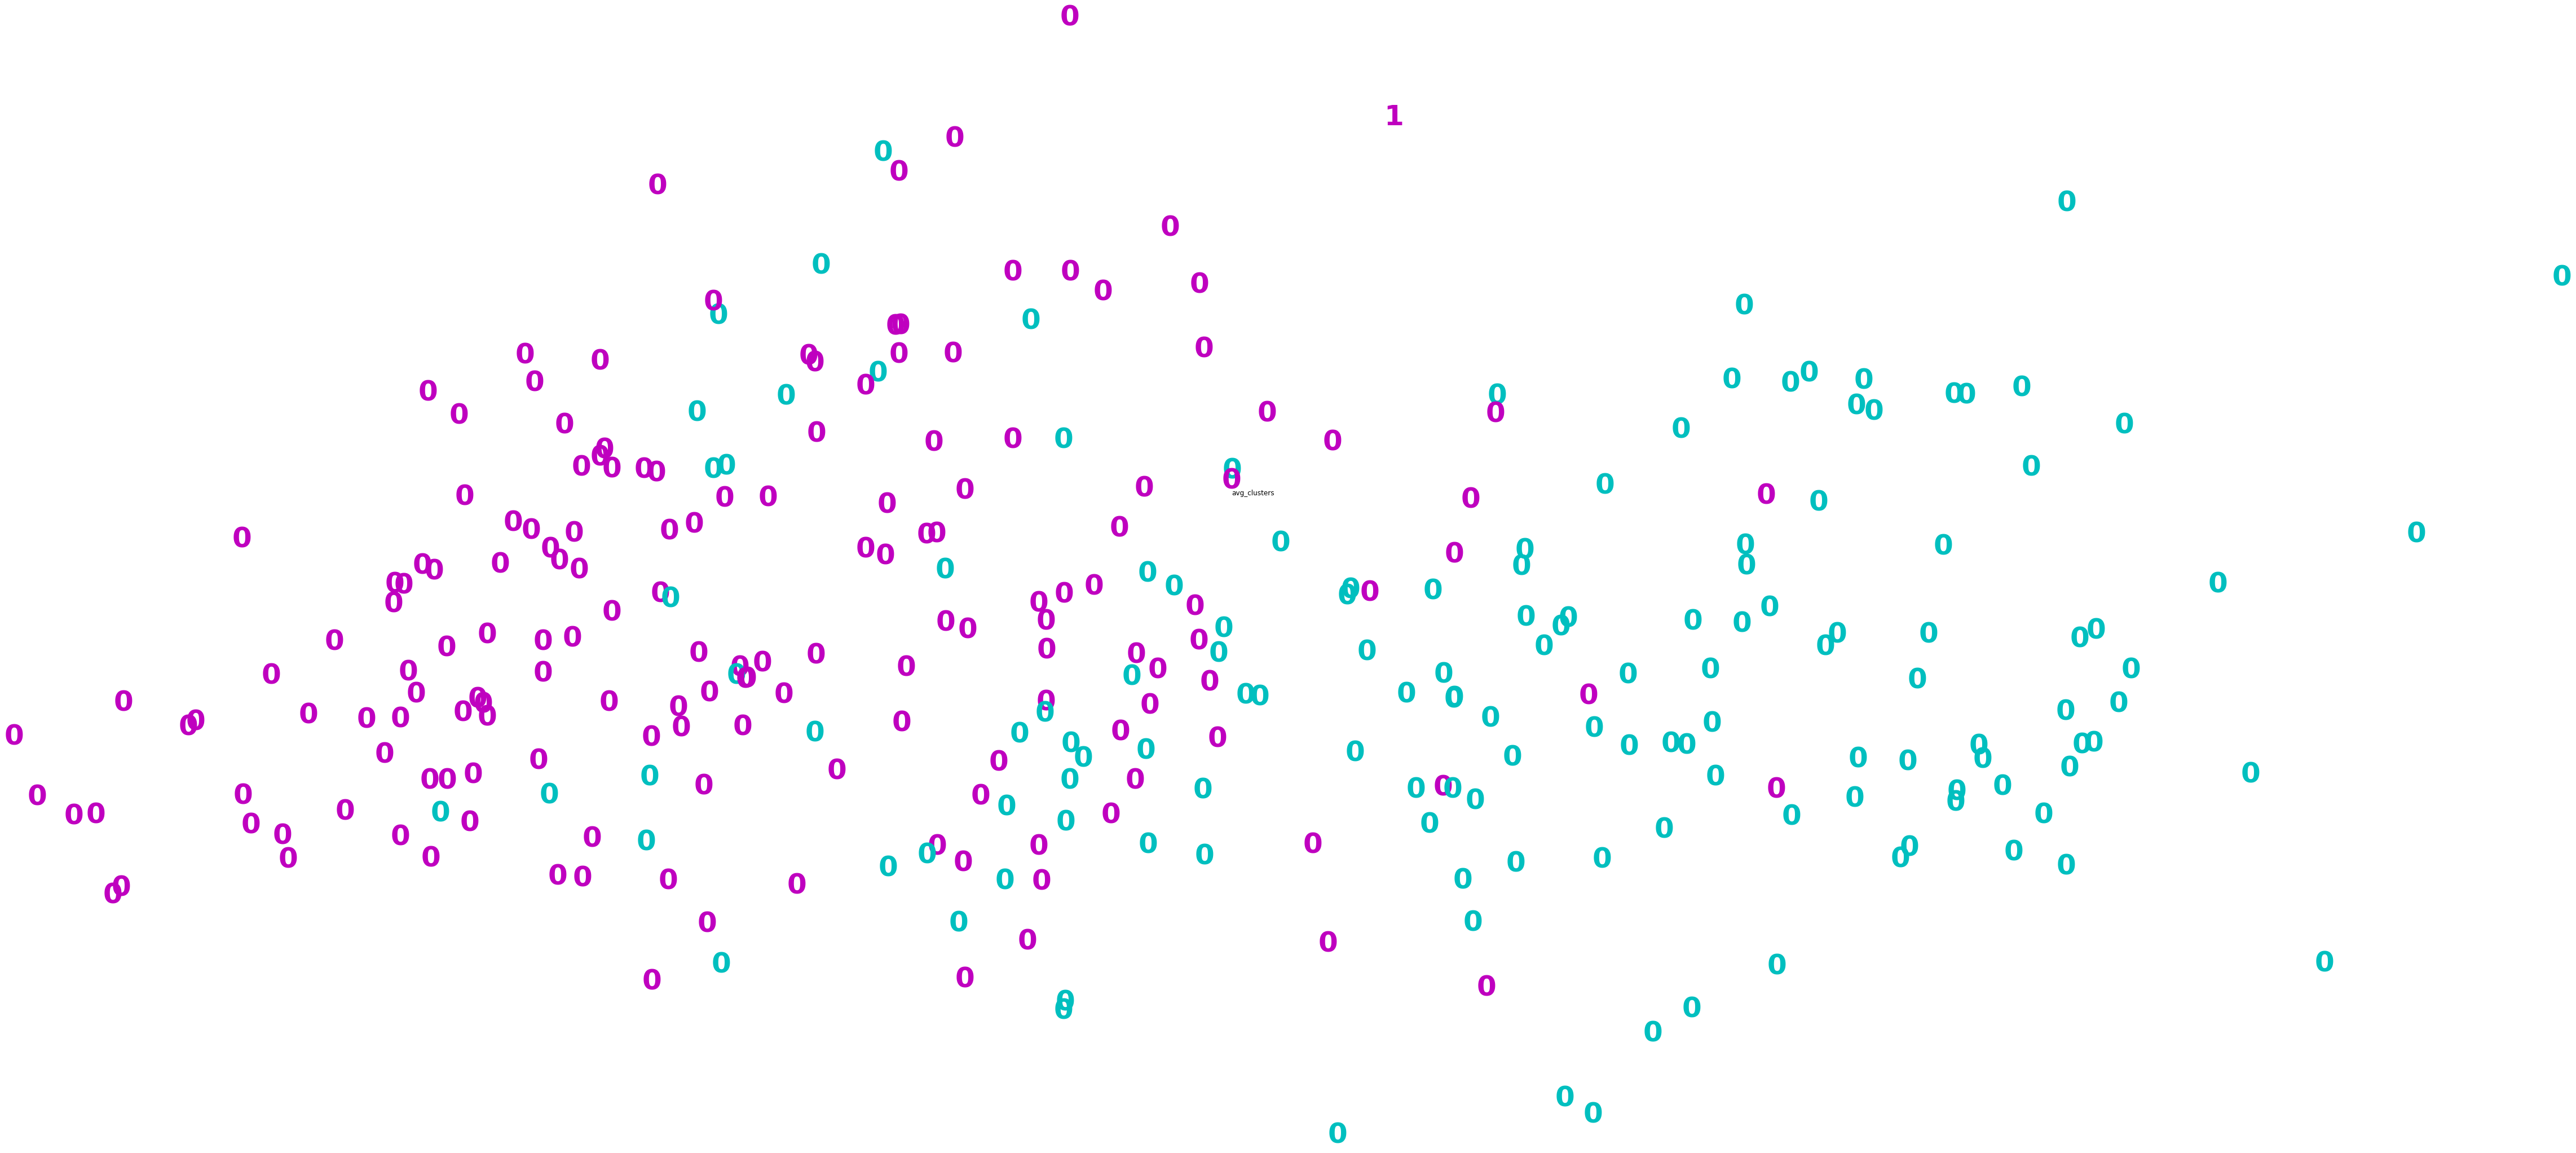

In [50]:
pca = PCA(n_components=2).fit_transform(X_std)

#plt.figure(figsize=(100,150))


plt.subplot(3,1,1)
plt.figure(figsize=(10,5))
colours = 'cmyk'
for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1], str(ward_clusters[i]),
            color = colours[y[i]],
            fontdict = {'weight':'bold','size':50}
            )
plt.title('ward_clusters')
plt.xticks([])
plt.yticks([])
plt.axis('off')
#plt.xlim(min(pca[0],max(pca[0])
#plt.ylim(min(pca[1],max(pca[1])
plt.show()


plt.subplot(3,1,2)
plt.figure(figsize=(10,5))
colours = 'cmyk'
for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1], str(comp_clusters[i]),
            color = colours[y[i]],
            fontdict = {'weight':'bold','size':50}
            )
plt.title('comp_clusters')
plt.xticks([])
plt.yticks([])
plt.axis('off')
#plt.xlim(min(pca[0],max(pca[0])
#plt.ylim(min(pca[1],max(pca[1])
plt.show()

plt.subplot(3,1,3)
plt.figure(figsize=(10,5))
colours = 'cmyk'
for i in range(pca.shape[0]):
    plt.text(pca[i,0],pca[i,1], str(avg_clusters[i]),
            color = colours[y[i]],
            fontdict = {'weight':'bold','size':50}
            )
plt.title('avg_clusters')
plt.xticks([])
plt.yticks([])
plt.axis('off')
#plt.xlim(min(pca[0],max(pca[0])
#plt.ylim(min(pca[1],max(pca[1])

plt.show()


In [51]:
print("Adjusted Rand Index of the WARD Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, ward_clusters)))
print("The silhoutte score of the WARD Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, ward_clusters, metric='euclidean')))

print('\n')


print("Adjusted Rand Index of the COMPLETE Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, comp_clusters)))
print("The silhoutte score of the COMPLETE Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, comp_clusters, metric='euclidean')))

print('\n')

print("Adjusted Rand Index of the AVERAGE Agglomerative Clustering solution: {}"
      .format(metrics.adjusted_rand_score(y, avg_clusters)))
print("The silhoutte score of the AVERAGE Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(X_std, avg_clusters, metric='euclidean')))

Adjusted Rand Index of the WARD Agglomerative Clustering solution: 0.146129913123814
The silhoutte score of the WARD Agglomerative Clustering solution: 0.1387197366557222


Adjusted Rand Index of the COMPLETE Agglomerative Clustering solution: 0.21394030618551016
The silhoutte score of the COMPLETE Agglomerative Clustering solution: 0.11730765444448985


Adjusted Rand Index of the AVERAGE Agglomerative Clustering solution: -0.0010061512759301477
The silhoutte score of the AVERAGE Agglomerative Clustering solution: 0.34836188921330785


the rand score was highest for the complete aglomerative clustering and the silhouette score was highest for the average clustering overall I would say that the Ward and Complete aglomeration methods where the most effective. 

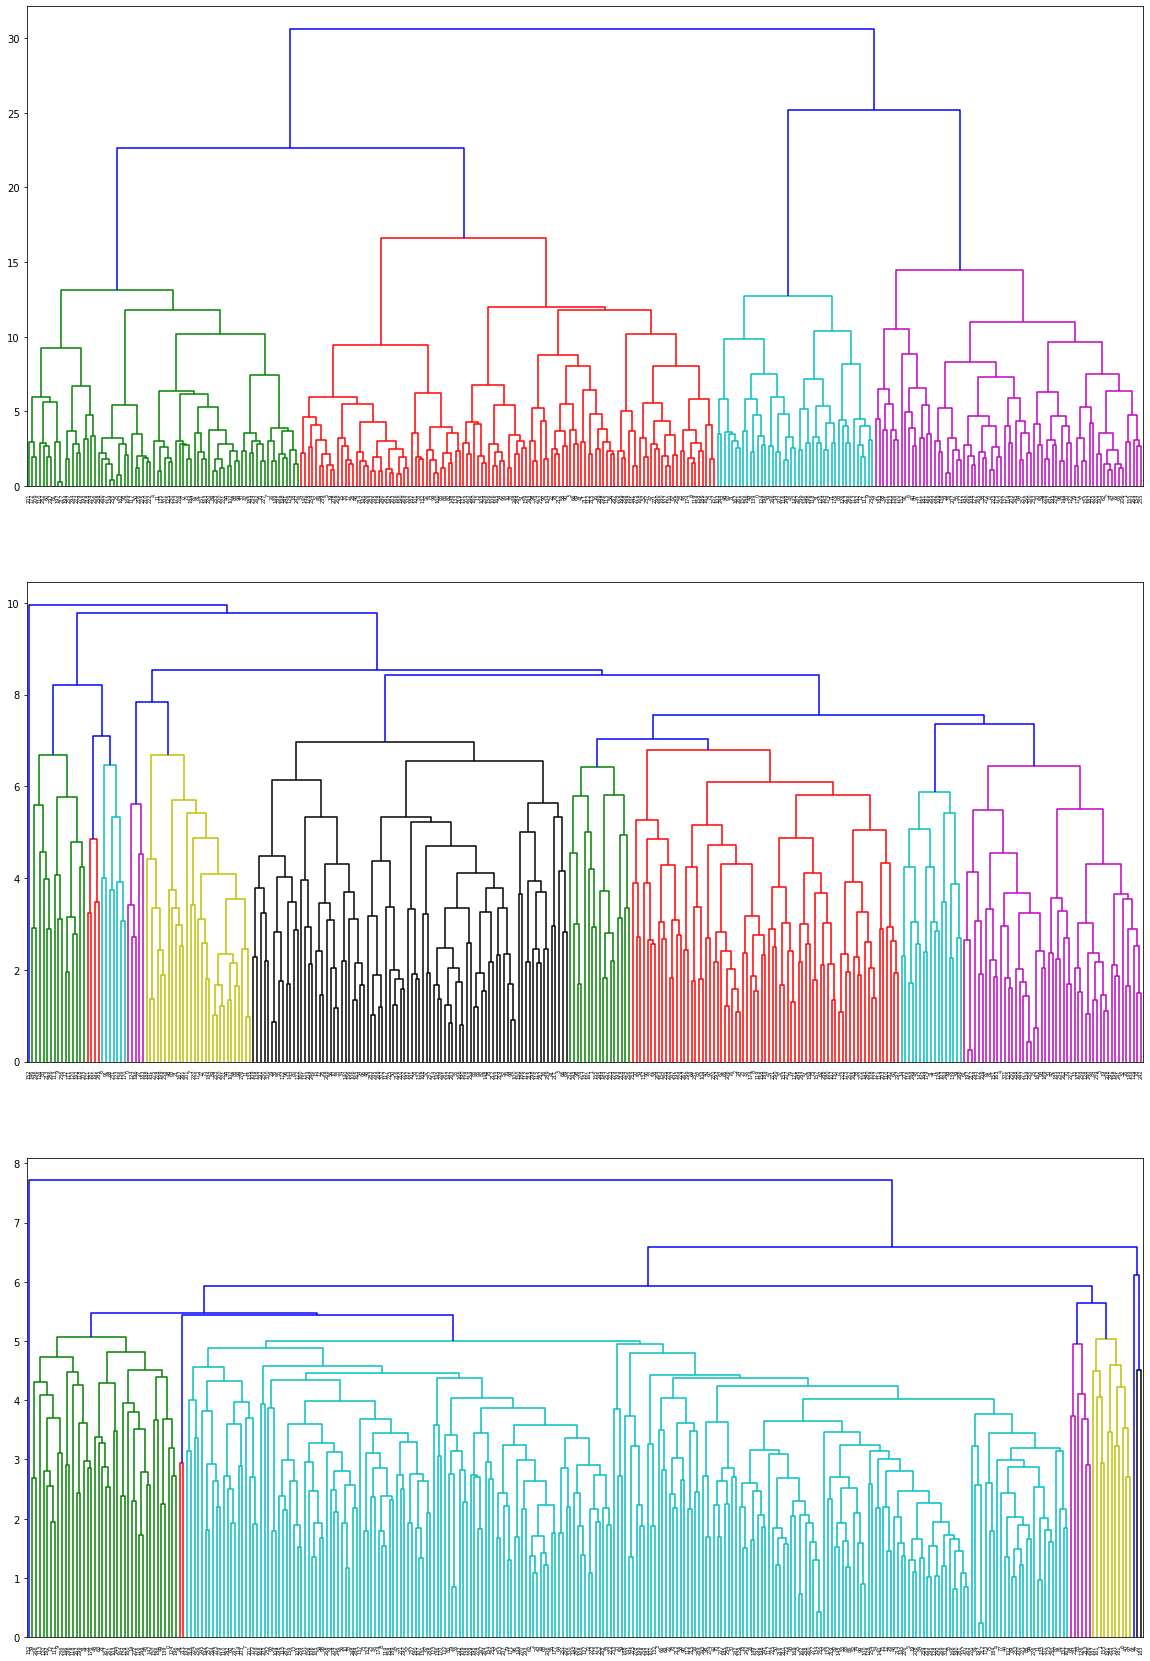

In [56]:
plt.figure(figsize=(20,30))
plt.subplot(3,1,1)
dendrogram(linkage(X_std, method='ward'))

plt.subplot(3,1,2)
dendrogram(linkage(X_std, method='complete'))

plt.subplot(3,1,3)
dendrogram(linkage(X_std, method='average'))
plt.show()

it apears that the ward and complete methods produced the best dendrograms while the average method resulted in several large and lopsided groups 